In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import pickle

import catboost as cb
print("cb.__version__:", cb.__version__)

# local modules
import sys
sys.path.append("../src")
from preproc import process_train_data, process_test_data

cb.__version__: 1.2.7


***
### load and preprocess data

In [2]:
# define some paths
path_raw = Path("../data/raw")
path_processed = Path("../data/processed")
path_results = Path("../data/results")

# load data
df_train = pd.read_csv(path_raw / "train.csv")
df_test = pd.read_csv(path_raw / "test.csv")

df_train

Id GameRulesetName                                        agent1  \
0            0             00Y        MCTS-ProgressiveHistory-0.1-MAST-false   
1            1             00Y        MCTS-ProgressiveHistory-0.1-MAST-false   
2            2             00Y         MCTS-ProgressiveHistory-0.1-MAST-true   
3            3             00Y         MCTS-ProgressiveHistory-0.1-MAST-true   
4            4             00Y         MCTS-ProgressiveHistory-0.1-MAST-true   
...        ...             ...                                           ...   
233229  233229     Zuz_Mel_7x7        MCTS-UCB1Tuned-1.41421356237-NST-false   
233230  233230     Zuz_Mel_7x7  MCTS-UCB1Tuned-1.41421356237-Random200-false   
233231  233231     Zuz_Mel_7x7  MCTS-UCB1Tuned-1.41421356237-Random200-false   
233232  233232     Zuz_Mel_7x7  MCTS-UCB1Tuned-1.41421356237-Random200-false   
233233  233233     Zuz_Mel_7x7   MCTS-UCB1Tuned-1.41421356237-Random200-true   

                                                   agent2  Properties  Format  \
0             MCTS-ProgressiveHistory-0.6-Random200-false           1       1   
1                             MCTS-UCB1GRAVE-0.6-NST-true           1       1   
2                                 MCTS-UCB1-0.1-NST-false           1       1   
3                                 MCTS-UCB1-0.6-NST-false           1       1   
4                  MCTS-UCB1GRAVE-1.41421356237-NST-false           1       1   
...                                                   ...         ...     ...   
233229  MCTS-ProgressiveHistory-1.41421356237-Random20...           1       1   
233230                           MCTS-UCB1-0.6-MAST-false           1       1   
233231             MCTS-UCB1GRAVE-1.41421356237-NST-false           1       1   
233232              MCTS-UCB1GRAVE-1.41421356237-NST-true           1       1   
233233                      MCTS-UCB1Tuned-0.6-MAST-false           1       1   

        Time  Discrete  Realtime  Turns  ...  DoLudeme  Trigger  \
0          1         1         0      1  ...         0        1   
1          1         1         0      1  ...         0        1   
2          1         1         0      1  ...         0        1   
3          1         1         0      1  ...         0        1   
4          1         1         0      1  ...         0        1   
...      ...       ...       ...    ...  ...       ...      ...   
233229     1         1         0      1  ...         0        0   
233230     1         1         0      1  ...         0        0   
233231     1         1         0      1  ...         0        0   
233232     1         1         0      1  ...         0        0   
233233     1         1         0      1  ...         0        0   

        PlayoutsPerSecond  MovesPerSecond  \
0                  298.07        18877.17   
1                  298.07        18877.17   
2                  298.07        18877.17   
3                  298.07        18877.17   
4                  298.07        18877.17   
...                   ...             ...   
233229             157.52       157174.58   
233230             157.52       157174.58   
233231             157.52       157174.58   
233232             157.52       157174.58   
233233             157.52       157174.58   

                                             EnglishRules  \
0       Goal: Connect all three edge colors with a sin...   
1       Goal: Connect all three edge colors with a sin...   
2       Goal: Connect all three edge colors with a sin...   
3       Goal: Connect all three edge colors with a sin...   
4       Goal: Connect all three edge colors with a sin...   
...                                                   ...   
233229  7x7 board. 24 pieces per player. Pieces begin ...   
233230  7x7 board. 24 pieces per player. Pieces begin ...   
233231  7x7 board. 24 pieces per player. Pieces begin ...   
233232  7x7 board. 24 pieces per player. Pieces begin ...   
233233  7x7 board. 24 pieces per player. Pieces begin ...   


In [3]:
!ls ../feat_selection | grep json

feat_selection_intersection_at_95.json
feat_selection_intersection_at_96.json
feat_selection_intersection_at_97.json
feat_selection_intersection_at_98.json
feat_selection_intersection_at_99.json
feat_selection_union_at_80.json
feat_selection_union_at_85.json
feat_selection_union_at_90.json
feat_selection_union_at_95.json
select_optuna_catb.json
select_optuna_combined_v23.json
select_optuna_combined_v24.json
select_optuna_combined_v34.json
select_optuna_lgbm_v1.json
select_optuna_lgbm_v2.json
select_optuna_lgbm_v3.json


In [4]:
# # Load the feature selection results
# with open('../feat_selection/select_optuna_lgbm.json', 'r') as f:
#     feature_selection_lgbm = json.load(f)

# with open('../feat_selection/select_optuna_lgbm_v3.json', 'r') as f:
#     feature_selection_lgbm = json.load(f)

# with open('../feat_selection/select_optuna_catb.json', 'r') as f:
#     feature_selection_catb = json.load(f)

# with open('../feat_selection/select_optuna_combined_v23.json', 'r') as f:
#     feature_selection = json.load(f)

with open('../feat_selection/select_optuna_combined_v24.json', 'r') as f:
    feature_selection = json.load(f)

# with open('../feat_selection/select_optuna_combined_v34.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_95.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_96.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_97.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_98.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_99.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_80.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_85.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_90.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_95.json', 'r') as f:
#     feature_selection = json.load(f)



# Extract the selected features
numerical_cols = feature_selection.get('numerical', [])
categorical_cols = feature_selection.get('categorical', [])

# numerical_cols = list(set(feature_selection_lgbm.get('numerical', []) + feature_selection_catb.get('numerical', [])))
# categorical_cols = list(set(feature_selection_lgbm.get('categorical', []) + feature_selection_catb.get('categorical', [])))

# text_cols = ["LudRules",]
text_cols = list()

print("Numerical features:", len(numerical_cols))
print("Categorical features:", len(categorical_cols))
print("Text features:", len(text_cols))

Numerical features: 147
Categorical features: 8
Text features: 0


In [5]:
df_train, numerical_cols, categorical_cols, encoder, scaler = process_train_data(
    df_train,
    scale=False,
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    include_position_features=True,
    include_text_features=False,
)

text_cols = list()

# Print the results
print("Numerical Columns:", len(numerical_cols))
print("Categorical Columns:", len(categorical_cols))

number of all nan cols:  0
number of constant cols:  0
Numerical Columns: 219
Categorical Columns: 8


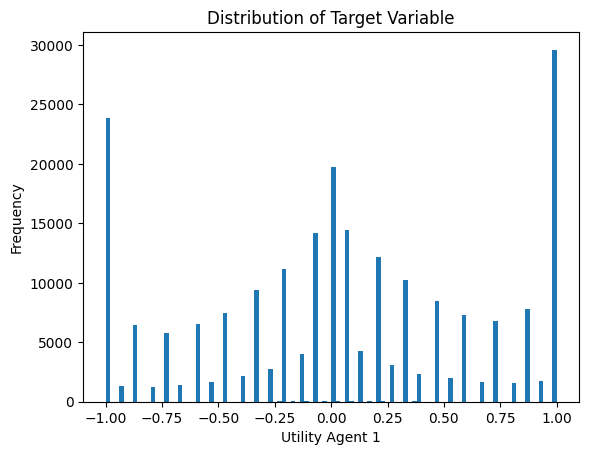

In [6]:
plt.hist(df_train['utility_agent1'], bins=100)
plt.title('Distribution of Target Variable')
plt.xlabel('Utility Agent 1')
plt.ylabel('Frequency')
plt.show()

In [7]:
split1 = pickle.load(open('../data/splits/cv1_Game.pkl', 'rb'))
split2 = pickle.load(open('../data/splits/cv2_Game.pkl', 'rb'))
split3 = pickle.load(open('../data/splits/cv3_Game.pkl', 'rb'))

# split1 = pickle.load(open('../data/splits/cv1_GameRulesetName.pkl', 'rb'))
# split2 = pickle.load(open('../data/splits/cv2_GameRulesetName.pkl', 'rb'))
# split3 = pickle.load(open('../data/splits/cv3_GameRulesetName.pkl', 'rb'))

***
### train model

In [8]:
def get_feature_importance(model, importance_type='PredictionValuesChange'):
    """
    Get feature importance from a trained CatBoost model
    
    Args:
        model: Trained CatBoost model
        importance_type: Type of feature importance to calculate
            Options: 'PredictionValuesChange', 'LossFunctionChange', 
            'ShapValues', 'Interaction', 'TopKitty'
        
    Returns:
        pandas.DataFrame: DataFrame containing feature names and their importance scores
    """
    # Get feature importance scores
    importance_scores = model.get_feature_importance(type=importance_type)
    feature_names = model.feature_names_
    
    # Create dataframe with feature names and importance scores
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_scores
    }).sort_values('importance', ascending=False, ignore_index=True)
    
    return importance_df


def plot_feature_importance(importance_df, top_n=100):
    plot_df = importance_df.head(top_n)
    
    plt.figure(figsize=(15, 5))
    plt.bar(x=range(len(plot_df)), height=plot_df['importance'])
    plt.xticks(range(len(plot_df)), plot_df['feature'], rotation=45, ha='right', fontsize=8)
    plt.ylabel('Importance Score')
    plt.title(f'Top {top_n} Most Important Features')
    plt.tight_layout()
    plt.show()

In [9]:
def train_models(
        df_train,
        numerical_cols,
        categorical_cols,
        text_cols,
        target='utility_agent1',
        split_list=None,
    ):
    # Define the parameters for CatBoost
    params = {

        'objective': "RMSE",
        'learning_rate': 0.1,
        'depth': 10,
        'iterations': 3000,
        'eval_metric': 'RMSE',
        'verbose': 0,
        'random_seed': 2112,
        'l2_leaf_reg': 1.,
        'random_strength': 0.2,
        'min_data_in_leaf': 50,
        'rsm': 0.8,
        'bagging_temperature' : 0.50,

        # 'text_processing': {
        #     'tokenizers': [{
        #         'tokenizer_id': 'Space',  # or 'GPT', 'Bert', etc.
        #         'separator_type': 'Space'
        #     }],
        #     'dictionaries': [{
        #         'dictionary_id': 'BiGram',
        #         'max_dictionary_size': '50000',
        #         'occurrence_lower_bound': '3',
        #         'gram_order': '2'
        #     }],
        #     'feature_calcers': [{
        #         'calcer_type': 'BoW',  # or 'NaiveBayes', 'BM25'
        #         'dictionary_id': 'BiGram'
        #     }]
        # }


        # # Text processing parameters to mimic TF-IDF
        # 'tokenizers': [{
        #     'tokenizer_id': 'Space',
        #     'separator_type': 'ByDelimiter',
        #     'delimiter': ' '
        # }],
        # 'dictionaries': [{
        #     'dictionary_id': 'NgramDict',
        #     'max_dictionary_size': '500',  # Match max_features=500
        #     'occurrence_lower_bound': '3',
        #     'gram_order': '3',  # Maximum n-gram size
        #     'min_gram_order': '2'  # Minimum n-gram size
        # }],
        # 'feature_calcers': [{
        #     'calcer_type': 'BoW',  # Most similar to TF-IDF
        #     'dictionary_id': 'NgramDict'
        # }],


        # 'tokenizers': [{
        #     'tokenizer_id': 'Space',
        #     'delimiter': ' ',
        #     'separator_type': 'ByDelimiter'
        # }],
        # 'dictionaries': [{
        #     'dictionary_id': 'Word',
        #     'max_dictionary_size': '50000',
        #     'occurrence_lower_bound': '3'
        # }],
        # 'feature_calcers': [{
        #     'calcer_type': 'BoW',
        #     'dictionary_id': 'Word',
        # }]
    }
    # Obtained with optuna
    # params = {
    #     'objective': 'RMSE',
    #     'verbose': False,
    #     'random_seed': 2112,
    #     'learning_rate': 0.1,
    #     'iterations': 3000,
    #     'bootstrap_type': 'Bayesian',
    #     'sampling_frequency': 'PerTreeLevel',
    #     'depth': 10,
    #     'l2_leaf_reg': 0.9359292512255313,
    #     'random_strength': 0.16693257025108216,
    #     'bagging_temperature': 0.15967219011745193,
    #     'rsm': 0.548125395769786,
    #     'min_data_in_leaf': 102,
    #     'max_ctr_complexity': 10
    # }

    trained_models = []
    oof = pd.DataFrame(
        index=df_train.index,
        columns=[f'{target}_true', f'{target}_pred', 'fold']
    )
    oof_scores = []
    feat_importance_dfs = []

    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(split_list, 1):
        print(f"Fold {fold}")
        
        # Split the data
        X_train, X_valid = df_train.iloc[train_index], df_train.iloc[val_index]
        y_train, y_valid = X_train[target], X_valid[target]

        # Initialize CatBoost Pool
        train_pool = cb.Pool(
            # data=X_train[numerical_cols + categorical_cols + text_cols],
            data=X_train[numerical_cols + categorical_cols],
            label=y_train,
            cat_features=categorical_cols,
            # text_features=text_cols
        )
        val_pool = cb.Pool(
            # data=X_valid[numerical_cols + categorical_cols + text_cols],
            data=X_valid[numerical_cols + categorical_cols],
            label=y_valid,
            cat_features=categorical_cols,
            # text_features=text_cols
        )
        
        # Initialize CatBoost Regressor
        model = cb.CatBoostRegressor(**params)
        
        # Train the model
        model.fit(
            train_pool,
            eval_set=val_pool,
            use_best_model=True,
            verbose=50
        )

        feat_importance = get_feature_importance(model)
        feat_importance = feat_importance.rename(columns={'importance': f'importance_f{fold}'})
        feat_importance_dfs.append(feat_importance)
        plot_feature_importance(feat_importance.rename(columns={f'importance_f{fold}': 'importance'}))
        
        # Save the trained model to the list
        trained_models.append(model)

        # Predict on validation set
        y_pred = model.predict(val_pool)

        # Save out-of-fold predictions
        oof.loc[val_index, f'{target}_true'] = y_valid
        oof.loc[val_index, f'{target}_pred'] = y_pred
        oof.loc[val_index, 'fold'] = fold
        
        # Compute RMSE
        y_pred = np.clip(y_pred, -1, 1)
        rmse = np.sqrt(np.mean((y_pred - y_valid) ** 2))
        print(f"Fold {fold} - RMSE: {rmse}")

        # Save RMSE to the list
        oof_scores.append(rmse)

    # Combine feature importance dataframes
    importance_df = feat_importance_dfs[0]
    for df in feat_importance_dfs[1:]:
        importance_df = importance_df.merge(df, on='feature')
    
    # Calculate mean importance across folds
    importance_cols = [col for col in importance_df.columns if col.startswith('importance_f')]
    importance_df['importance_mean'] = importance_df[importance_cols].mean(axis=1)
    importance_df = importance_df.sort_values('importance_mean', ascending=False, ignore_index=True)
    importance_df['importance_relative'] = (
        importance_df['importance_mean'] / 
        importance_df['importance_mean'].sum()
    )

    # Print the list of oof scores and average oof score
    print("List of oof scores:", oof_scores)
    print("Average oof score:", np.mean(oof_scores))

    return trained_models, oof, oof_scores, importance_df

Fold 1
0:	learn: 0.6122311	test: 0.5468228	best: 0.5468228 (0)	total: 134ms	remaining: 6m 40s
50:	learn: 0.3888695	test: 0.4685621	best: 0.4685148 (48)	total: 3.65s	remaining: 3m 30s
100:	learn: 0.3483937	test: 0.4503069	best: 0.4503069 (100)	total: 7.22s	remaining: 3m 27s
150:	learn: 0.3259594	test: 0.4413909	best: 0.4413909 (150)	total: 11s	remaining: 3m 27s
200:	learn: 0.3100387	test: 0.4375714	best: 0.4375714 (200)	total: 14.7s	remaining: 3m 24s
250:	learn: 0.2992632	test: 0.4351790	best: 0.4351790 (250)	total: 18.4s	remaining: 3m 21s
300:	learn: 0.2895833	test: 0.4327262	best: 0.4327262 (300)	total: 22.2s	remaining: 3m 18s
350:	learn: 0.2821247	test: 0.4312489	best: 0.4312489 (350)	total: 25.9s	remaining: 3m 15s
400:	learn: 0.2759185	test: 0.4304966	best: 0.4304966 (400)	total: 29.7s	remaining: 3m 12s
450:	learn: 0.2697099	test: 0.4299525	best: 0.4299452 (445)	total: 33.5s	remaining: 3m 9s
500:	learn: 0.2642549	test: 0.4291608	best: 0.4291608 (500)	total: 37.4s	remaining: 3m 6s
55

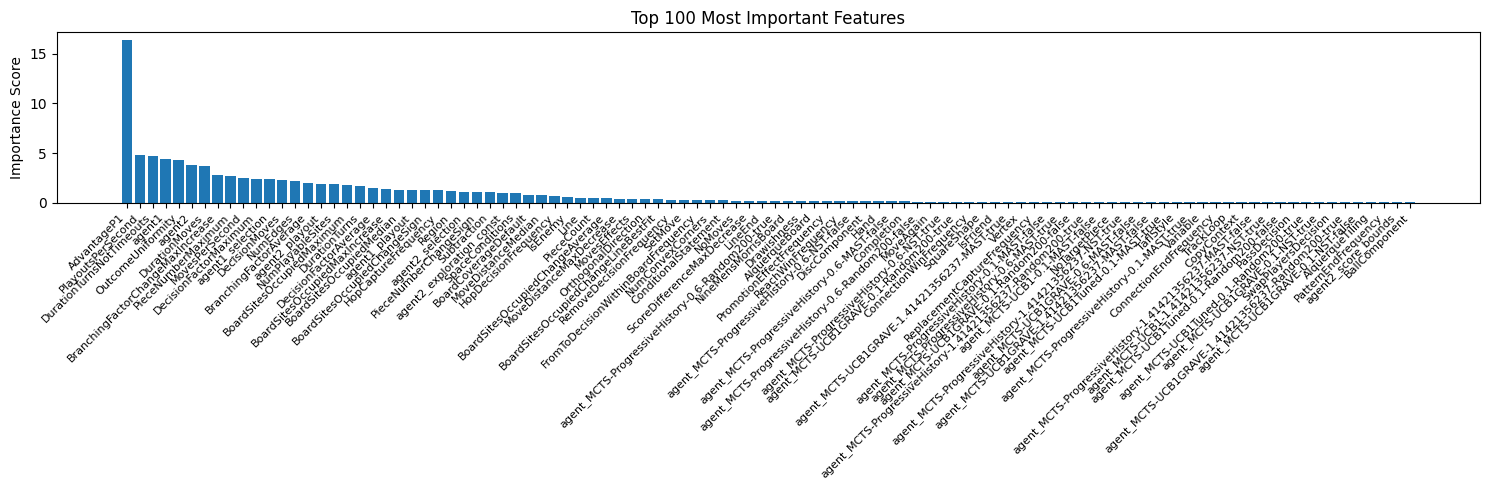

Fold 1 - RMSE: 0.4247144140601778
Fold 2
0:	learn: 0.6056122	test: 0.5802729	best: 0.5802729 (0)	total: 79.6ms	remaining: 3m 58s
50:	learn: 0.3930867	test: 0.4713266	best: 0.4713266 (50)	total: 3.52s	remaining: 3m 23s
100:	learn: 0.3522722	test: 0.4539879	best: 0.4539879 (100)	total: 7.27s	remaining: 3m 28s
150:	learn: 0.3314674	test: 0.4491531	best: 0.4491127 (147)	total: 11s	remaining: 3m 26s
200:	learn: 0.3174360	test: 0.4469017	best: 0.4468805 (199)	total: 14.6s	remaining: 3m 22s
250:	learn: 0.3066356	test: 0.4448721	best: 0.4448721 (250)	total: 18.3s	remaining: 3m 20s
300:	learn: 0.2973202	test: 0.4425314	best: 0.4425314 (300)	total: 22s	remaining: 3m 17s
350:	learn: 0.2895243	test: 0.4416537	best: 0.4416537 (350)	total: 25.8s	remaining: 3m 14s
400:	learn: 0.2828366	test: 0.4401907	best: 0.4401907 (400)	total: 29.5s	remaining: 3m 11s
450:	learn: 0.2768083	test: 0.4392406	best: 0.4392406 (450)	total: 33.2s	remaining: 3m 7s
500:	learn: 0.2719325	test: 0.4382743	best: 0.4382537 (494)

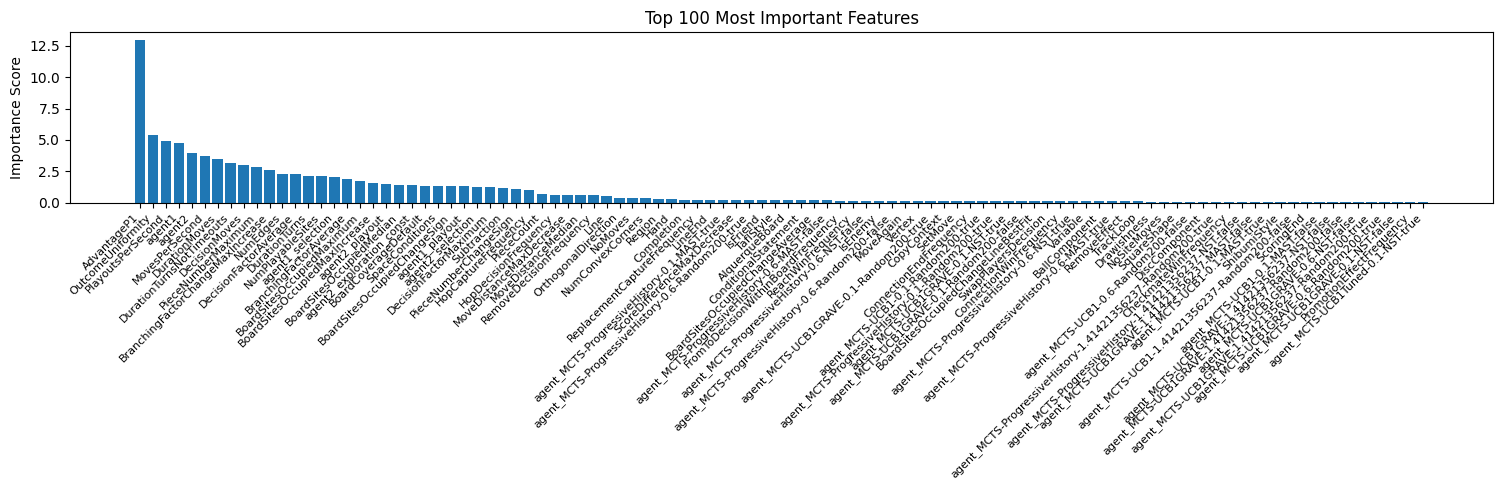

Fold 2 - RMSE: 0.4316860202978753
Fold 3
0:	learn: 0.6046529	test: 0.5949462	best: 0.5949462 (0)	total: 71.4ms	remaining: 3m 34s
50:	learn: 0.3914759	test: 0.4539853	best: 0.4539853 (50)	total: 3.73s	remaining: 3m 35s
100:	learn: 0.3546301	test: 0.4398339	best: 0.4398339 (100)	total: 7.74s	remaining: 3m 42s
150:	learn: 0.3330775	test: 0.4324602	best: 0.4324602 (150)	total: 11.6s	remaining: 3m 39s
200:	learn: 0.3173833	test: 0.4286814	best: 0.4286814 (200)	total: 15.6s	remaining: 3m 37s
250:	learn: 0.3066400	test: 0.4253271	best: 0.4253271 (250)	total: 19.6s	remaining: 3m 35s
300:	learn: 0.2968289	test: 0.4235478	best: 0.4235478 (300)	total: 23.7s	remaining: 3m 32s
350:	learn: 0.2896646	test: 0.4220667	best: 0.4220667 (350)	total: 27.7s	remaining: 3m 29s
400:	learn: 0.2826894	test: 0.4215615	best: 0.4214841 (397)	total: 31.7s	remaining: 3m 25s
450:	learn: 0.2765828	test: 0.4200643	best: 0.4200643 (450)	total: 35.8s	remaining: 3m 22s
500:	learn: 0.2709580	test: 0.4195194	best: 0.4195194 

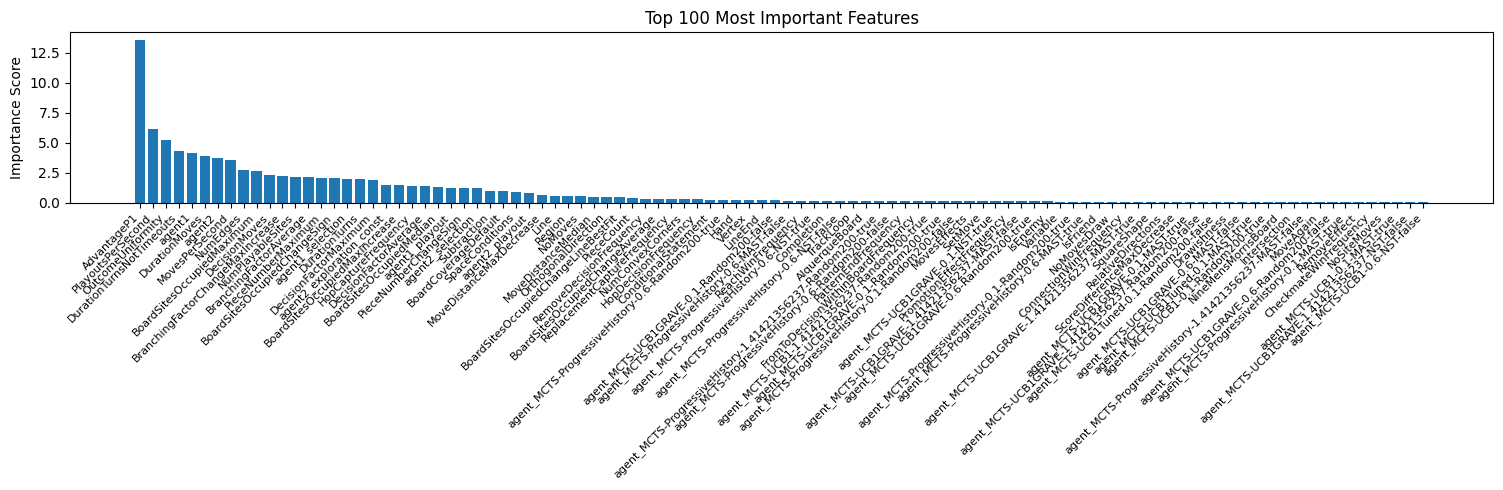

Fold 3 - RMSE: 0.41277613718795975
Fold 4
0:	learn: 0.6051256	test: 0.5855796	best: 0.5855796 (0)	total: 64.7ms	remaining: 3m 14s
50:	learn: 0.3889493	test: 0.4788956	best: 0.4788956 (50)	total: 3.73s	remaining: 3m 35s
100:	learn: 0.3508820	test: 0.4593646	best: 0.4593646 (100)	total: 7.73s	remaining: 3m 41s
150:	learn: 0.3298131	test: 0.4526335	best: 0.4526335 (150)	total: 11.6s	remaining: 3m 39s
200:	learn: 0.3146643	test: 0.4484720	best: 0.4484720 (200)	total: 15.5s	remaining: 3m 36s
250:	learn: 0.3028374	test: 0.4461206	best: 0.4461192 (248)	total: 19.4s	remaining: 3m 32s
300:	learn: 0.2937011	test: 0.4442934	best: 0.4442934 (300)	total: 23.3s	remaining: 3m 29s
350:	learn: 0.2856589	test: 0.4429479	best: 0.4429330 (347)	total: 27.3s	remaining: 3m 25s
400:	learn: 0.2790590	test: 0.4420149	best: 0.4420143 (396)	total: 31.3s	remaining: 3m 22s
450:	learn: 0.2733947	test: 0.4408745	best: 0.4408271 (447)	total: 35.2s	remaining: 3m 19s
500:	learn: 0.2676301	test: 0.4401411	best: 0.4401306

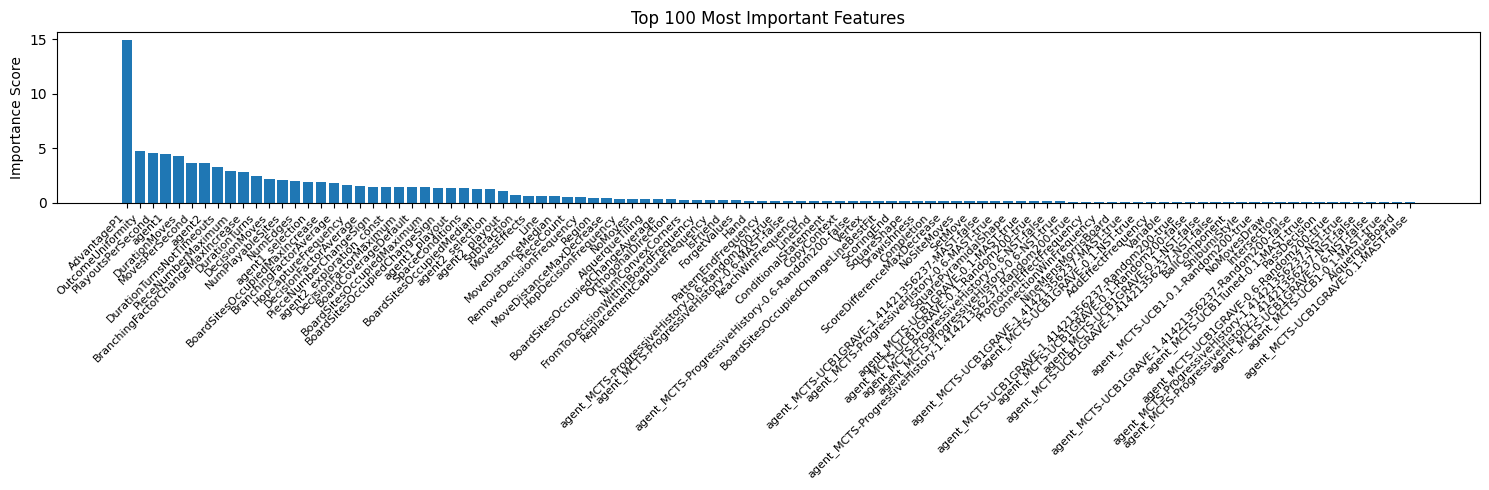

Fold 4 - RMSE: 0.43361854580674764
Fold 5
0:	learn: 0.6169450	test: 0.5418953	best: 0.5418953 (0)	total: 59.9ms	remaining: 2m 59s
50:	learn: 0.3980077	test: 0.4445172	best: 0.4445172 (50)	total: 3.58s	remaining: 3m 27s
100:	learn: 0.3584805	test: 0.4251822	best: 0.4251822 (100)	total: 7.43s	remaining: 3m 33s
150:	learn: 0.3383021	test: 0.4190536	best: 0.4190536 (150)	total: 11.3s	remaining: 3m 32s
200:	learn: 0.3224430	test: 0.4143086	best: 0.4143086 (200)	total: 15.1s	remaining: 3m 30s
250:	learn: 0.3114067	test: 0.4117132	best: 0.4116941 (249)	total: 19.1s	remaining: 3m 28s
300:	learn: 0.3016922	test: 0.4094944	best: 0.4094944 (300)	total: 22.9s	remaining: 3m 25s
350:	learn: 0.2931924	test: 0.4074159	best: 0.4074159 (350)	total: 26.8s	remaining: 3m 22s
400:	learn: 0.2858192	test: 0.4066342	best: 0.4066342 (400)	total: 30.7s	remaining: 3m 19s
450:	learn: 0.2798601	test: 0.4052278	best: 0.4052278 (450)	total: 34.7s	remaining: 3m 16s
500:	learn: 0.2737207	test: 0.4044788	best: 0.4044788

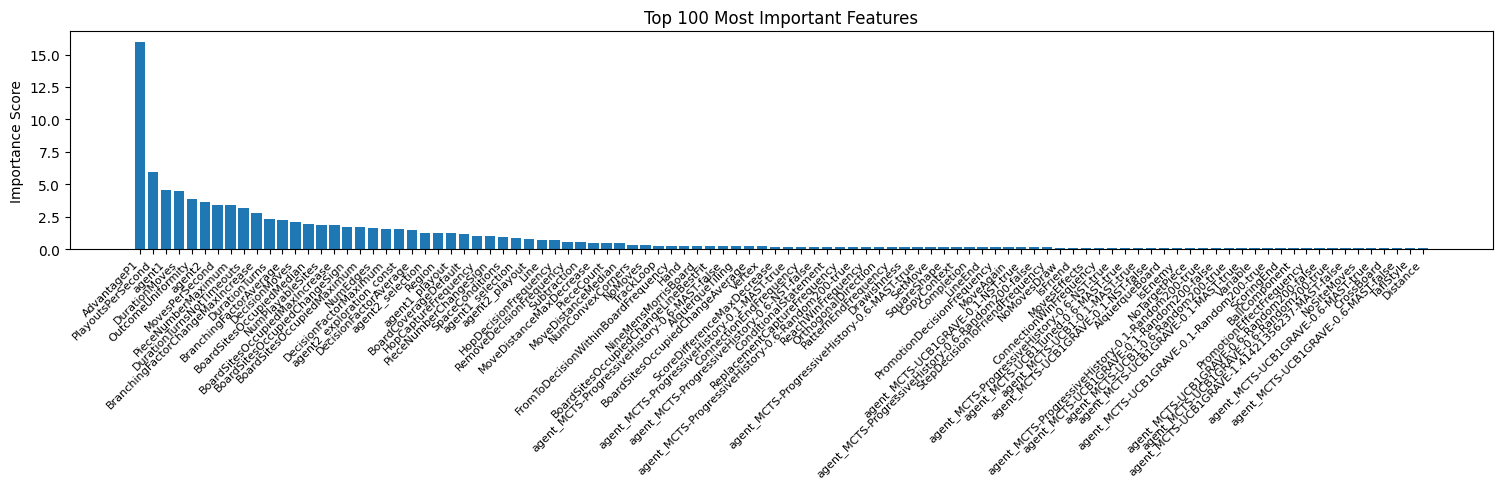

Fold 5 - RMSE: 0.39850341829542546
List of oof scores: [0.4247144140601778, 0.4316860202978753, 0.41277613718795975, 0.43361854580674764, 0.39850341829542546]
Average oof score: 0.4202597071296372


In [11]:
# call the function
trained_models1, oof1, oof_scores1, importance_df1 = train_models(
    df_train, 
    numerical_cols, 
    categorical_cols, 
    text_cols=text_cols,
    split_list=split1,
)
# save oof predictions
oof1.to_parquet(path_results / 'oof_catboost_fs24_cv1.parquet', index=False)
# save feature importance
# importance_df1.to_csv(path_results / 'feat_importance_catboost_cv1_fs.csv', index=False)

Fold 1
0:	learn: 0.6181362	test: 0.5299895	best: 0.5299895 (0)	total: 63.1ms	remaining: 3m 9s
50:	learn: 0.3966165	test: 0.4466678	best: 0.4464861 (49)	total: 3.72s	remaining: 3m 35s
100:	learn: 0.3535308	test: 0.4306185	best: 0.4306185 (100)	total: 7.58s	remaining: 3m 37s
150:	learn: 0.3309326	test: 0.4255810	best: 0.4255810 (150)	total: 11.4s	remaining: 3m 34s
200:	learn: 0.3156516	test: 0.4230544	best: 0.4230544 (200)	total: 15.3s	remaining: 3m 32s
250:	learn: 0.3042657	test: 0.4210294	best: 0.4209978 (249)	total: 19.1s	remaining: 3m 29s
300:	learn: 0.2950900	test: 0.4197580	best: 0.4197580 (300)	total: 23.1s	remaining: 3m 27s
350:	learn: 0.2868005	test: 0.4190950	best: 0.4190950 (350)	total: 27.1s	remaining: 3m 24s
400:	learn: 0.2792754	test: 0.4176066	best: 0.4175937 (399)	total: 31s	remaining: 3m 21s
450:	learn: 0.2732170	test: 0.4163163	best: 0.4163163 (450)	total: 35s	remaining: 3m 17s
500:	learn: 0.2672424	test: 0.4158491	best: 0.4156655 (498)	total: 38.9s	remaining: 3m 14s
55

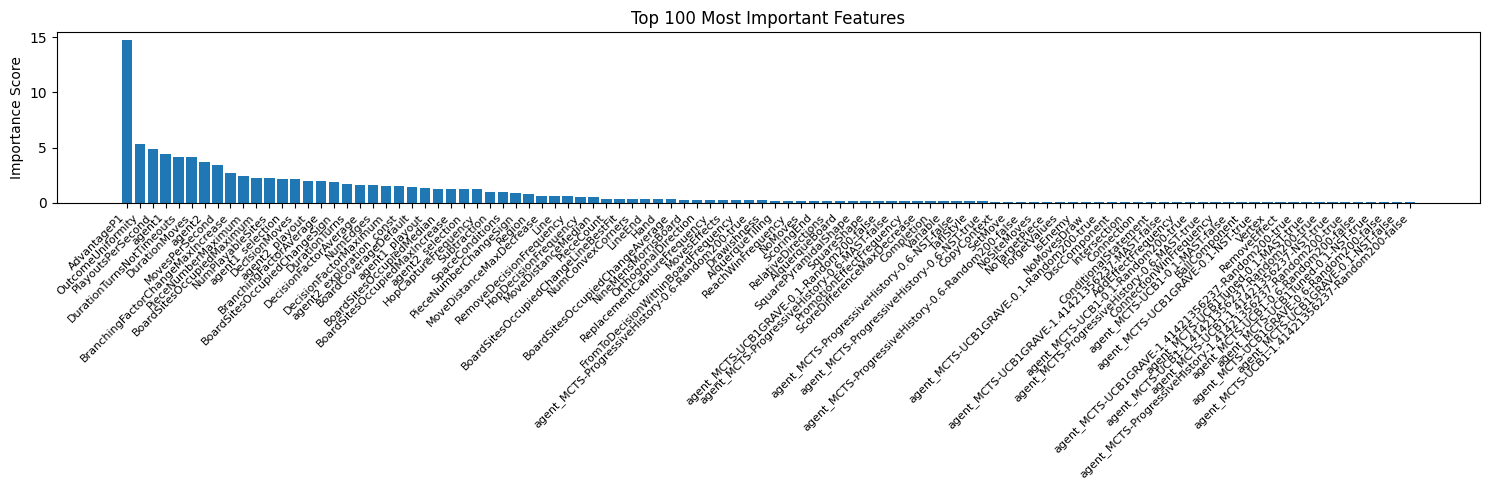

Fold 1 - RMSE: 0.4113714231995735
Fold 2
0:	learn: 0.6151410	test: 0.5369738	best: 0.5369738 (0)	total: 75ms	remaining: 3m 44s
50:	learn: 0.3926040	test: 0.4241386	best: 0.4241386 (50)	total: 3.82s	remaining: 3m 40s
100:	learn: 0.3521382	test: 0.4118564	best: 0.4117869 (99)	total: 7.78s	remaining: 3m 43s
150:	learn: 0.3305382	test: 0.4076785	best: 0.4076785 (150)	total: 11.7s	remaining: 3m 40s
200:	learn: 0.3145292	test: 0.4065088	best: 0.4063940 (196)	total: 15.6s	remaining: 3m 37s
250:	learn: 0.3035032	test: 0.4055365	best: 0.4054323 (246)	total: 19.5s	remaining: 3m 34s
300:	learn: 0.2939971	test: 0.4045961	best: 0.4045690 (290)	total: 23.5s	remaining: 3m 30s
350:	learn: 0.2867041	test: 0.4037364	best: 0.4037169 (348)	total: 27.5s	remaining: 3m 27s
400:	learn: 0.2786917	test: 0.4033688	best: 0.4032465 (384)	total: 31.4s	remaining: 3m 23s
450:	learn: 0.2724167	test: 0.4030457	best: 0.4030457 (450)	total: 35.4s	remaining: 3m 20s
500:	learn: 0.2669315	test: 0.4028791	best: 0.4028586 (47

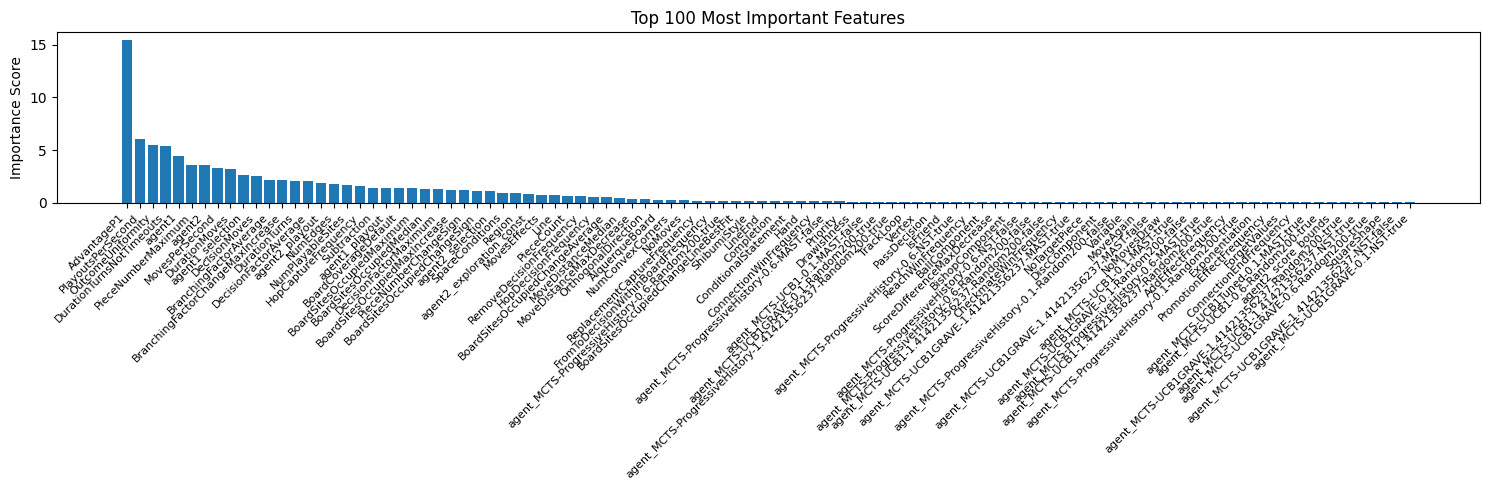

Fold 2 - RMSE: 0.4017557569297188
Fold 3
0:	learn: 0.6006462	test: 0.6054900	best: 0.6054900 (0)	total: 74.6ms	remaining: 3m 43s
50:	learn: 0.3845307	test: 0.4806685	best: 0.4806685 (50)	total: 3.78s	remaining: 3m 38s
100:	learn: 0.3468797	test: 0.4592485	best: 0.4592485 (100)	total: 7.82s	remaining: 3m 44s
150:	learn: 0.3265372	test: 0.4487334	best: 0.4487334 (150)	total: 11.8s	remaining: 3m 43s
200:	learn: 0.3122265	test: 0.4440350	best: 0.4439699 (198)	total: 15.9s	remaining: 3m 41s
250:	learn: 0.3010492	test: 0.4407873	best: 0.4407873 (250)	total: 20s	remaining: 3m 38s
300:	learn: 0.2915355	test: 0.4381752	best: 0.4381551 (299)	total: 24.1s	remaining: 3m 36s
350:	learn: 0.2833132	test: 0.4366478	best: 0.4366478 (350)	total: 28.2s	remaining: 3m 32s
400:	learn: 0.2765386	test: 0.4355627	best: 0.4355516 (399)	total: 32.2s	remaining: 3m 28s
450:	learn: 0.2705207	test: 0.4342040	best: 0.4342040 (450)	total: 36.3s	remaining: 3m 24s
500:	learn: 0.2656223	test: 0.4333605	best: 0.4333318 (4

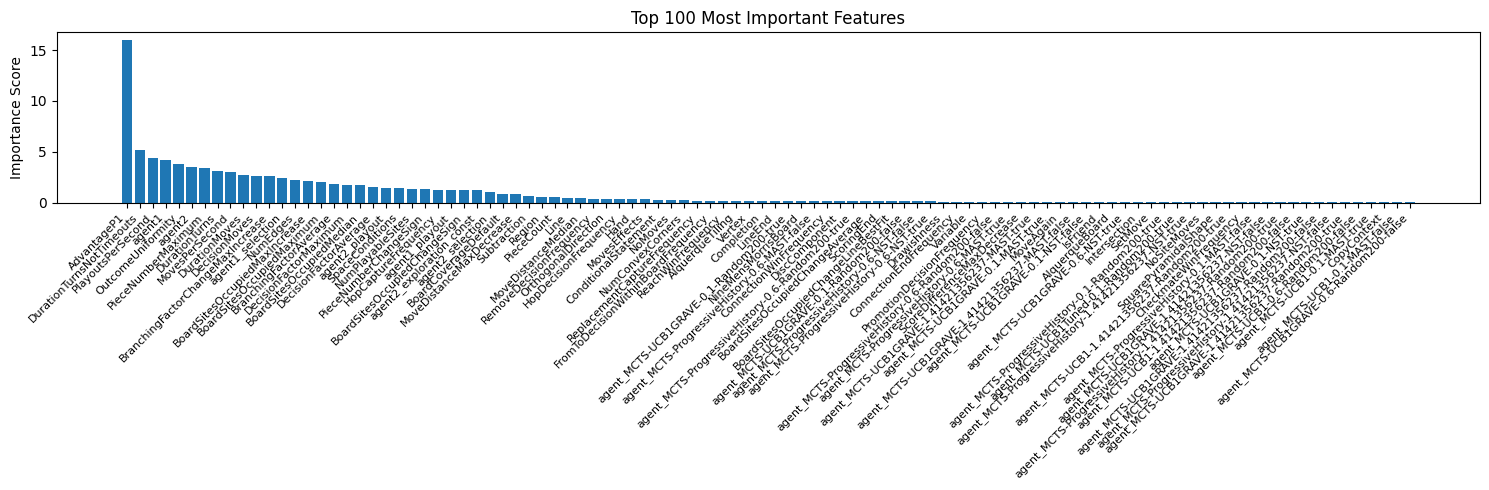

Fold 3 - RMSE: 0.42614277284229274
Fold 4
0:	learn: 0.6036854	test: 0.5956034	best: 0.5956034 (0)	total: 73.2ms	remaining: 3m 39s
50:	learn: 0.3922772	test: 0.4750076	best: 0.4750076 (50)	total: 3.78s	remaining: 3m 38s
100:	learn: 0.3545358	test: 0.4536158	best: 0.4536158 (100)	total: 7.87s	remaining: 3m 45s
150:	learn: 0.3325187	test: 0.4442902	best: 0.4442711 (148)	total: 11.9s	remaining: 3m 45s
200:	learn: 0.3182927	test: 0.4404259	best: 0.4403838 (198)	total: 16s	remaining: 3m 42s
250:	learn: 0.3074544	test: 0.4373347	best: 0.4373347 (250)	total: 20s	remaining: 3m 39s
300:	learn: 0.2972856	test: 0.4356752	best: 0.4356752 (300)	total: 24.1s	remaining: 3m 35s
350:	learn: 0.2892141	test: 0.4350033	best: 0.4349420 (346)	total: 28.1s	remaining: 3m 32s
400:	learn: 0.2820379	test: 0.4337386	best: 0.4336552 (389)	total: 32.2s	remaining: 3m 29s
450:	learn: 0.2761165	test: 0.4324648	best: 0.4323704 (444)	total: 36.3s	remaining: 3m 25s
500:	learn: 0.2705973	test: 0.4320322	best: 0.4319637 (49

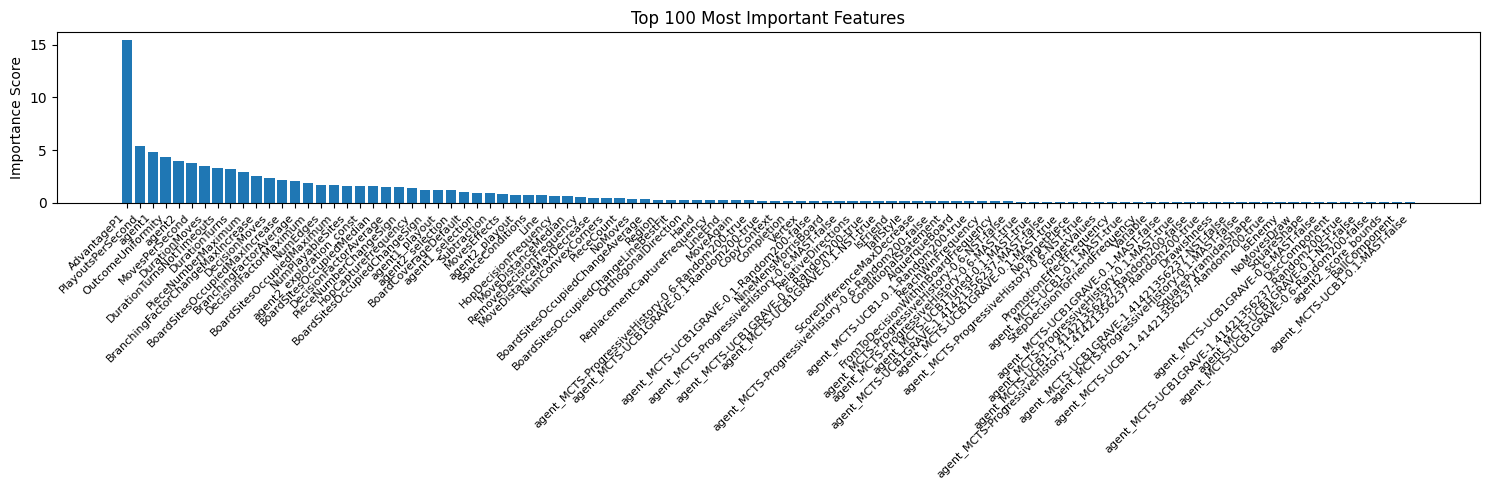

Fold 4 - RMSE: 0.42509808633069573
Fold 5
0:	learn: 0.6053769	test: 0.5855854	best: 0.5855854 (0)	total: 59ms	remaining: 2m 56s
50:	learn: 0.3908715	test: 0.4677807	best: 0.4677807 (50)	total: 3.67s	remaining: 3m 32s
100:	learn: 0.3546544	test: 0.4480933	best: 0.4480933 (100)	total: 7.72s	remaining: 3m 41s
150:	learn: 0.3330181	test: 0.4402855	best: 0.4402855 (150)	total: 11.7s	remaining: 3m 40s
200:	learn: 0.3179681	test: 0.4351952	best: 0.4351952 (200)	total: 15.6s	remaining: 3m 37s
250:	learn: 0.3059101	test: 0.4319051	best: 0.4317747 (244)	total: 19.6s	remaining: 3m 34s
300:	learn: 0.2959924	test: 0.4288287	best: 0.4288287 (300)	total: 23.6s	remaining: 3m 31s
350:	learn: 0.2877826	test: 0.4276982	best: 0.4276982 (350)	total: 27.5s	remaining: 3m 27s
400:	learn: 0.2812710	test: 0.4261790	best: 0.4261776 (399)	total: 31.6s	remaining: 3m 24s
450:	learn: 0.2752384	test: 0.4254249	best: 0.4254249 (450)	total: 35.7s	remaining: 3m 21s
500:	learn: 0.2693260	test: 0.4242890	best: 0.4242600 (

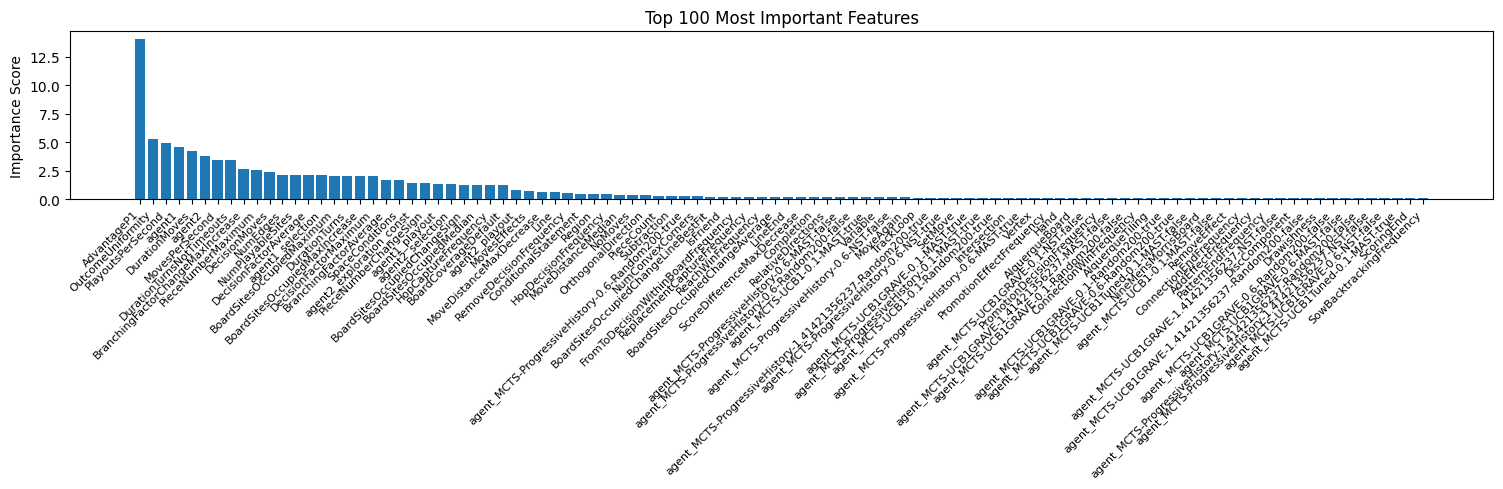

Fold 5 - RMSE: 0.41634555263900686
List of oof scores: [0.4113714231995735, 0.4017557569297188, 0.42614277284229274, 0.42509808633069573, 0.41634555263900686]
Average oof score: 0.41614271838825745


In [12]:
# call the function
trained_models2, oof2, oof_scores2, importance_df2 = train_models(
    df_train, 
    numerical_cols, 
    categorical_cols, 
    text_cols=text_cols,
    split_list=split2,
)
# save oof predictions
oof2.to_parquet(path_results / 'oof_catboost_fs24_cv2.parquet', index=False)

Fold 1
0:	learn: 0.6097468	test: 0.5705515	best: 0.5705515 (0)	total: 67.4ms	remaining: 3m 22s
50:	learn: 0.3882880	test: 0.4598913	best: 0.4598913 (50)	total: 3.84s	remaining: 3m 41s
100:	learn: 0.3482785	test: 0.4462576	best: 0.4462576 (100)	total: 7.91s	remaining: 3m 46s
150:	learn: 0.3280807	test: 0.4410756	best: 0.4410756 (150)	total: 11.8s	remaining: 3m 43s
200:	learn: 0.3137205	test: 0.4383372	best: 0.4383372 (200)	total: 15.8s	remaining: 3m 40s
250:	learn: 0.3026518	test: 0.4359200	best: 0.4359200 (250)	total: 19.9s	remaining: 3m 38s
300:	learn: 0.2930567	test: 0.4333501	best: 0.4333501 (300)	total: 23.9s	remaining: 3m 34s
350:	learn: 0.2853000	test: 0.4323445	best: 0.4323248 (347)	total: 27.9s	remaining: 3m 30s
400:	learn: 0.2789430	test: 0.4310158	best: 0.4309835 (399)	total: 31.9s	remaining: 3m 27s
450:	learn: 0.2728311	test: 0.4305084	best: 0.4304797 (445)	total: 36.1s	remaining: 3m 23s
500:	learn: 0.2677252	test: 0.4300092	best: 0.4300092 (500)	total: 40.2s	remaining: 3m 2

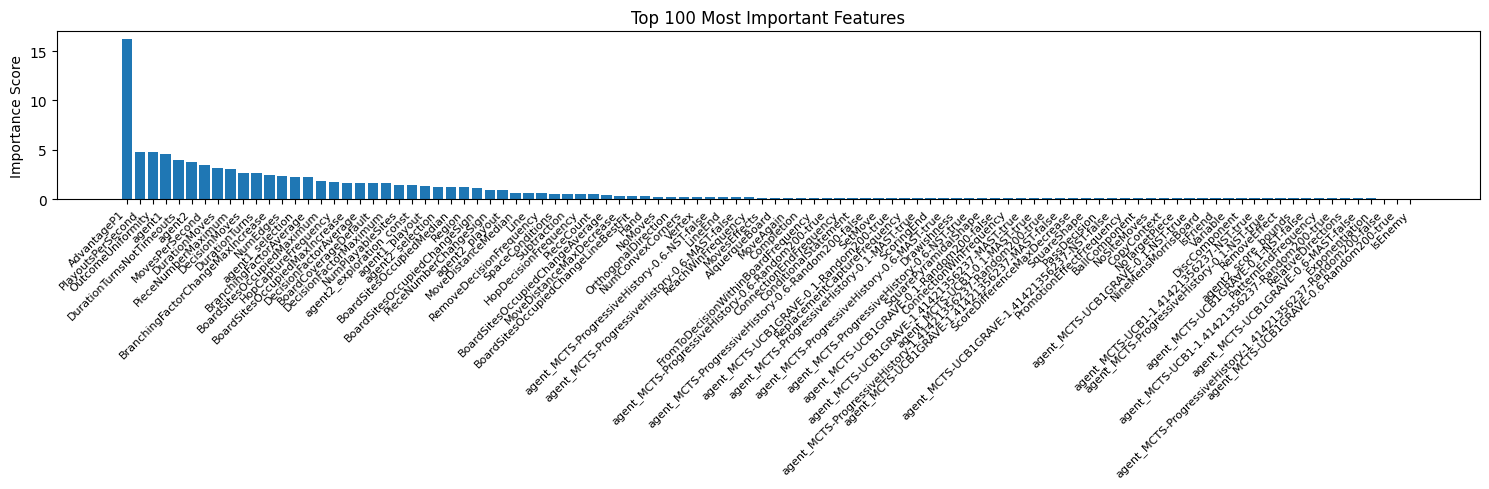

Fold 1 - RMSE: 0.4266342459620777
Fold 2
0:	learn: 0.6083042	test: 0.5667284	best: 0.5667284 (0)	total: 64.3ms	remaining: 3m 12s
50:	learn: 0.3915419	test: 0.4670550	best: 0.4670550 (50)	total: 3.79s	remaining: 3m 38s
100:	learn: 0.3557262	test: 0.4477898	best: 0.4477898 (100)	total: 7.83s	remaining: 3m 44s
150:	learn: 0.3316851	test: 0.4373891	best: 0.4373891 (150)	total: 11.8s	remaining: 3m 42s
200:	learn: 0.3169343	test: 0.4325912	best: 0.4325912 (200)	total: 15.8s	remaining: 3m 40s
250:	learn: 0.3054125	test: 0.4288532	best: 0.4288532 (250)	total: 19.8s	remaining: 3m 37s
300:	learn: 0.2963317	test: 0.4263065	best: 0.4263065 (300)	total: 23.9s	remaining: 3m 34s
350:	learn: 0.2875110	test: 0.4249328	best: 0.4249328 (350)	total: 27.9s	remaining: 3m 30s
400:	learn: 0.2805325	test: 0.4236065	best: 0.4236065 (400)	total: 32.1s	remaining: 3m 27s
450:	learn: 0.2739824	test: 0.4225578	best: 0.4225578 (450)	total: 36.2s	remaining: 3m 24s
500:	learn: 0.2682616	test: 0.4214503	best: 0.4214015 

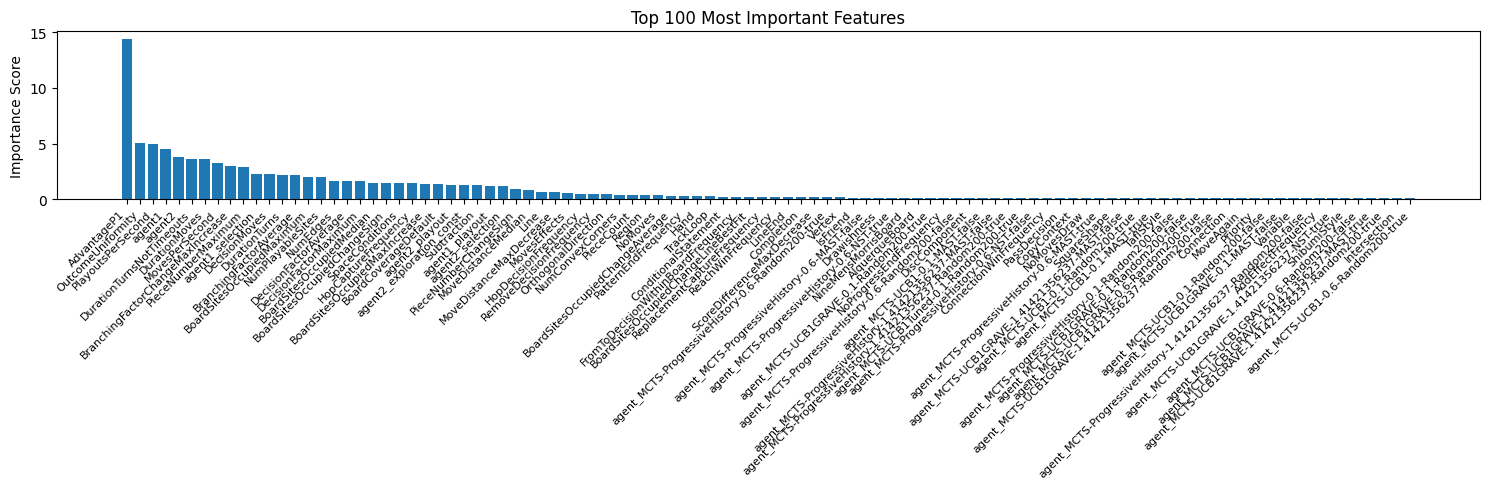

Fold 2 - RMSE: 0.4136473302946463
Fold 3
0:	learn: 0.6109054	test: 0.5677904	best: 0.5677904 (0)	total: 72.5ms	remaining: 3m 37s
50:	learn: 0.3939326	test: 0.4562815	best: 0.4562815 (50)	total: 3.66s	remaining: 3m 31s
100:	learn: 0.3543308	test: 0.4398738	best: 0.4398738 (100)	total: 7.59s	remaining: 3m 37s
150:	learn: 0.3321252	test: 0.4317671	best: 0.4317671 (150)	total: 11.5s	remaining: 3m 37s
200:	learn: 0.3165090	test: 0.4275880	best: 0.4275880 (200)	total: 15.4s	remaining: 3m 34s
250:	learn: 0.3046225	test: 0.4244498	best: 0.4244498 (250)	total: 19.3s	remaining: 3m 31s
300:	learn: 0.2951935	test: 0.4225489	best: 0.4225275 (299)	total: 23.3s	remaining: 3m 28s
350:	learn: 0.2881639	test: 0.4212115	best: 0.4211840 (349)	total: 27.3s	remaining: 3m 25s
400:	learn: 0.2813145	test: 0.4198314	best: 0.4198081 (397)	total: 31.2s	remaining: 3m 22s
450:	learn: 0.2754389	test: 0.4190353	best: 0.4187610 (439)	total: 35.2s	remaining: 3m 18s
500:	learn: 0.2699804	test: 0.4180696	best: 0.4180505 

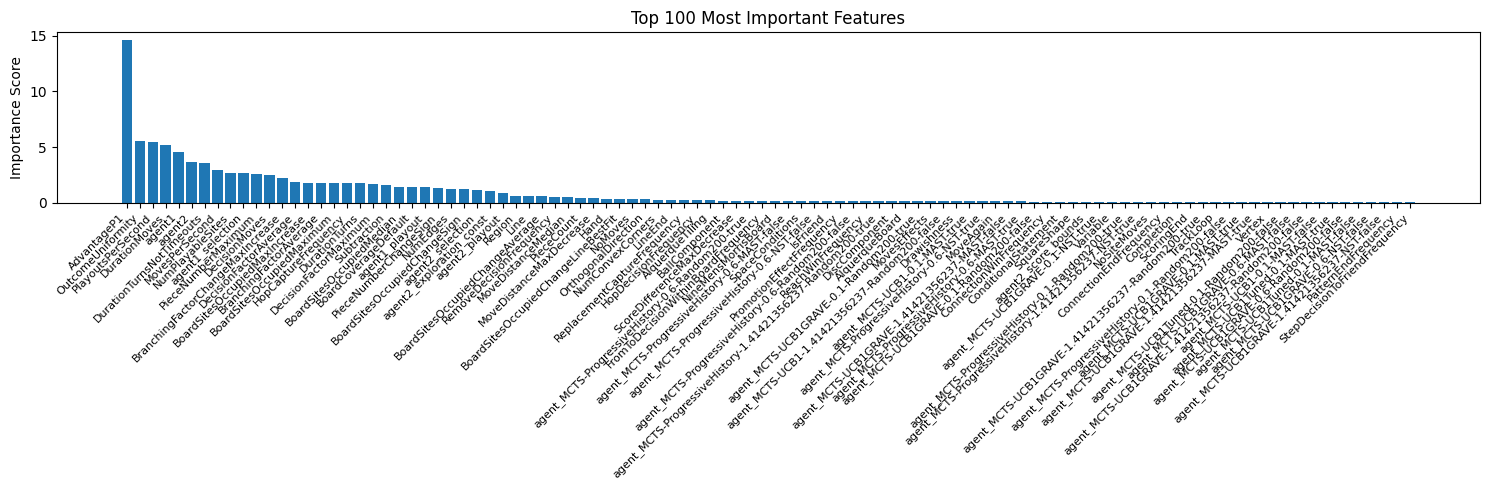

Fold 3 - RMSE: 0.4106993692741305
Fold 4
0:	learn: 0.6110578	test: 0.5663472	best: 0.5663472 (0)	total: 71.9ms	remaining: 3m 35s
50:	learn: 0.3918472	test: 0.4592632	best: 0.4592632 (50)	total: 3.88s	remaining: 3m 44s
100:	learn: 0.3530066	test: 0.4465552	best: 0.4465552 (100)	total: 7.82s	remaining: 3m 44s
150:	learn: 0.3310939	test: 0.4400187	best: 0.4400187 (150)	total: 11.8s	remaining: 3m 41s
200:	learn: 0.3163457	test: 0.4364969	best: 0.4364969 (200)	total: 15.8s	remaining: 3m 40s
250:	learn: 0.3042817	test: 0.4338368	best: 0.4338189 (249)	total: 20s	remaining: 3m 39s
300:	learn: 0.2947988	test: 0.4317006	best: 0.4317006 (300)	total: 24.1s	remaining: 3m 35s
350:	learn: 0.2868944	test: 0.4304760	best: 0.4304760 (350)	total: 28.3s	remaining: 3m 33s
400:	learn: 0.2801477	test: 0.4290594	best: 0.4290533 (399)	total: 32.8s	remaining: 3m 32s
450:	learn: 0.2746118	test: 0.4283590	best: 0.4283590 (450)	total: 37.2s	remaining: 3m 30s
500:	learn: 0.2695696	test: 0.4275899	best: 0.4275899 (5

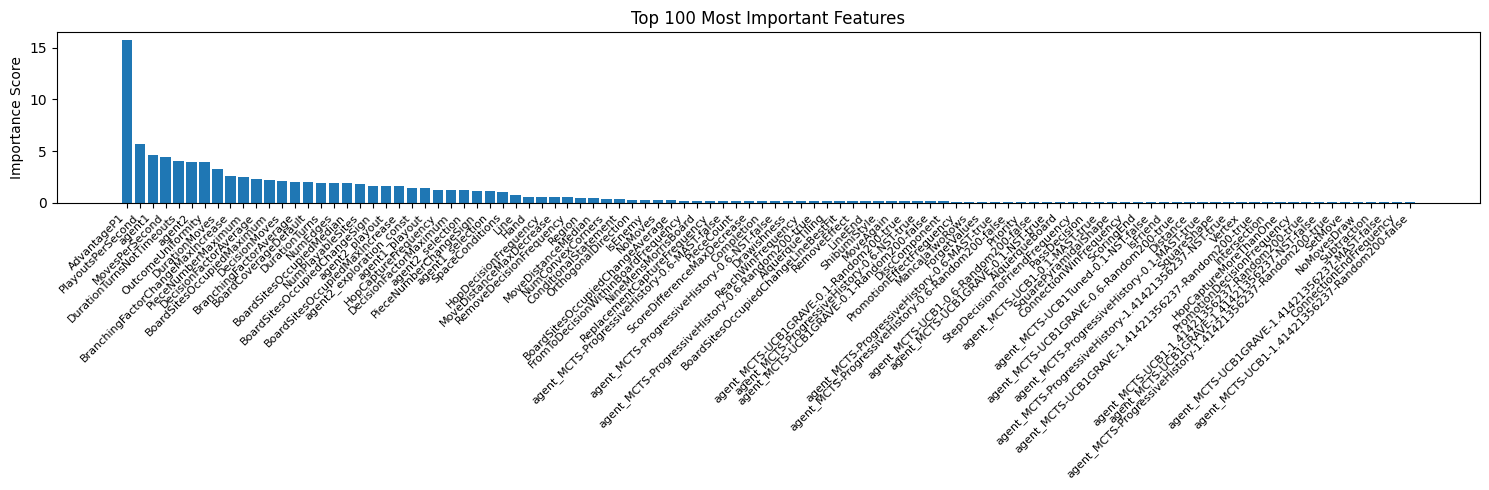

Fold 4 - RMSE: 0.4228062632142165
Fold 5
0:	learn: 0.6067902	test: 0.5813372	best: 0.5813372 (0)	total: 63.3ms	remaining: 3m 9s
50:	learn: 0.3943536	test: 0.4755970	best: 0.4755970 (50)	total: 3.87s	remaining: 3m 43s
100:	learn: 0.3542197	test: 0.4527500	best: 0.4527500 (100)	total: 7.95s	remaining: 3m 48s
150:	learn: 0.3321484	test: 0.4431248	best: 0.4431248 (150)	total: 12.1s	remaining: 3m 47s
200:	learn: 0.3173801	test: 0.4383540	best: 0.4383540 (200)	total: 16.1s	remaining: 3m 44s
250:	learn: 0.3054589	test: 0.4347100	best: 0.4347100 (250)	total: 20.2s	remaining: 3m 41s
300:	learn: 0.2957822	test: 0.4322774	best: 0.4322774 (300)	total: 24.3s	remaining: 3m 37s
350:	learn: 0.2877855	test: 0.4303202	best: 0.4303202 (350)	total: 28.5s	remaining: 3m 34s
400:	learn: 0.2810905	test: 0.4291618	best: 0.4291618 (400)	total: 32.7s	remaining: 3m 31s
450:	learn: 0.2747339	test: 0.4279105	best: 0.4279105 (450)	total: 37s	remaining: 3m 29s
500:	learn: 0.2691082	test: 0.4270533	best: 0.4270533 (50

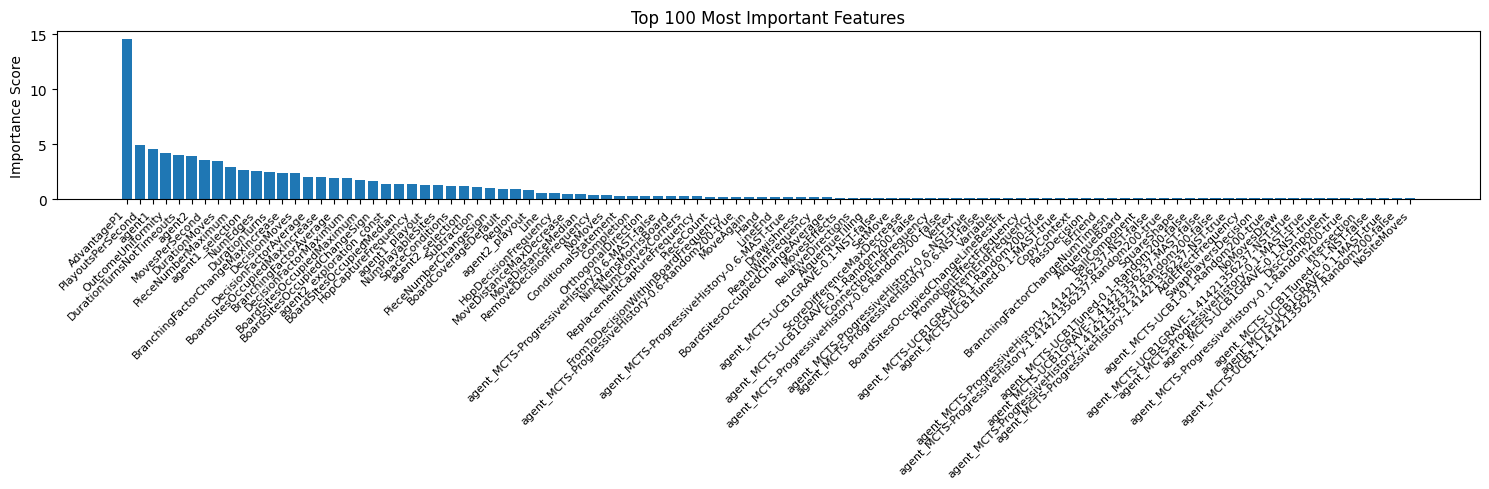

Fold 5 - RMSE: 0.42136108587880683
List of oof scores: [0.4266342459620777, 0.4136473302946463, 0.4106993692741305, 0.4228062632142165, 0.42136108587880683]
Average oof score: 0.41902965892477556


In [13]:
# call the function
trained_models3, oof3, oof_scores3, importance_df3 = train_models(
    df_train, 
    numerical_cols, 
    categorical_cols, 
    text_cols=text_cols,
    split_list=split3,
)
# save oof predictions
oof3.to_parquet(path_results / 'oof_catboost_fs24_cv3.parquet', index=False)


In [14]:
trained_models = [*trained_models1, *trained_models2, *trained_models3]
# trained_models = trained_models1

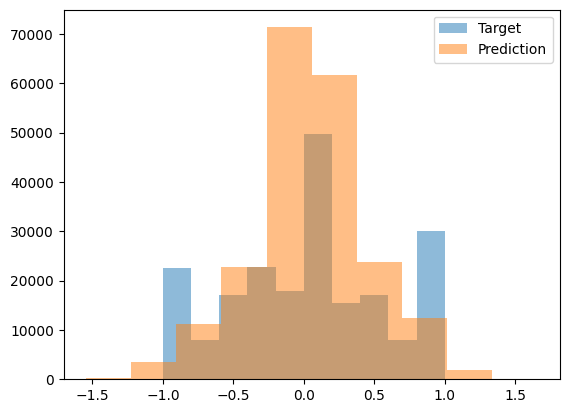

In [15]:
plt.hist(oof1['utility_agent1_true'], alpha=0.5, label='Target')
plt.hist(oof1['utility_agent1_pred'], alpha=0.5, label='Prediction')
plt.legend()
plt.show()

***
### inference

In [16]:
import os
import polars as pl
sys.path.append("../data/raw/")
import kaggle_evaluation.mcts_inference_server

In [17]:
def predict(test: pl.DataFrame, sample_sub: pl.DataFrame):
    # Convert Polars DataFrame to Pandas DataFrame
    test_pd = test.to_pandas()
    
    # Process the test data
    test_processed = process_test_data(
        test_pd,
        numerical_cols,
        categorical_cols,
        encoder,
        scaler,
        include_position_features=True,
        include_text_features=True,
    )

    # Create CatBoost Pool for test data
    test_pool = cb.Pool(
        # data=test_processed[numerical_cols + categorical_cols + text_cols],
        data=test_processed[numerical_cols + categorical_cols],
        cat_features=categorical_cols,
        # text_features=text_cols,
    )

    # Average predictions from all models
    predictions = np.mean([
        model.predict(test_pool)
        for model in trained_models
    ], axis=0)
    predictions = np.clip(predictions, -1, 1)
        
    # Create the submission DataFrame
    submission = sample_sub.with_columns(pl.Series("utility_agent1", predictions))
    
    return submission

In [18]:
# sanity check
df_test = pl.read_csv('../data/raw/test.csv')
sample_sub = pl.read_csv('../data/raw/sample_submission.csv')
predict(df_test, sample_sub)

shape: (3, 2)
┌────────┬────────────────┐
│ Id     ┆ utility_agent1 │
│ ---    ┆ ---            │
│ i64    ┆ f64            │
╞════════╪════════════════╡
│ 233234 ┆ 0.125596       │
│ 233235 ┆ -0.142686      │
│ 233236 ┆ -0.018968      │
└────────┴────────────────┘

In [19]:
inference_server = kaggle_evaluation.mcts_inference_server.MCTSInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(
        (
            '../data/raw/test.csv',
            '../data/raw/sample_submission.csv'
        )
    )

In [21]:
# Save all artifacts needed for prediction
catboost_predict = {
    'models': trained_models,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'text_cols': text_cols,
    'encoder': encoder, 
    'scaler': scaler
}

with open('./catboost_predict_fs24.pkl', 'wb') as f:
    pickle.dump(catboost_predict, f)

***